In [ ]:
import pandas as pd
import glob
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
files = np.sort(glob.glob("/content/drive/MyDrive/Combined_data/*.csv"))
import keras


dataframe = pd.DataFrame(columns=['temp_vals','label'])
empty_list = []
label_list = []
for i in files:
    df = pd.read_csv(i)
    create_arr = df.iloc[:, 0].to_list()
    empty_list.append(create_arr)
    if 'Grad_temp_drop' in i:
        label_list.append(1)
    elif 'Shrp_temp_drop' in i:
        label_list.append(0)

dataframe['temp_vals'] = empty_list
dataframe['label'] = label_list

X = dataframe['temp_vals'].to_list()
Y = dataframe['label'].to_list()

print(len(X))

66


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

46
20
46
20


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import tensorflow as tf
from tensorflow.keras import layers


In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(450,)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_test, Y_test))

Epoch 1/50
2/2 [==============================] - 1s 289ms/step - loss: 1.6881 - accuracy: 0.4783 - val_loss: 1.0974 - val_accuracy: 0.4000
Epoch 2/50
2/2 [==============================] - 0s 44ms/step - loss: 0.9693 - accuracy: 0.5652 - val_loss: 2.3430 - val_accuracy: 0.4000
Epoch 3/50
2/2 [==============================] - 0s 42ms/step - loss: 1.2732 - accuracy: 0.6304 - val_loss: 1.5074 - val_accuracy: 0.4000
Epoch 4/50
2/2 [==============================] - 0s 43ms/step - loss: 0.9129 - accuracy: 0.6522 - val_loss: 0.6168 - val_accuracy: 0.7500
Epoch 5/50
2/2 [==============================] - 0s 42ms/step - loss: 0.8173 - accuracy: 0.5217 - val_loss: 0.6053 - val_accuracy: 0.7500
Epoch 6/50
2/2 [==============================] - 0s 52ms/step - loss: 0.8077 - accuracy: 0.6304 - val_loss: 0.8335 - val_accuracy: 0.4500
Epoch 7/50
2/2 [==============================] - 0s 40ms/step - loss: 0.5548 - accuracy: 0.7391 - val_loss: 1.0558 - val_accuracy: 0.4500
Epoch 8/50
2/2 [==========

In [ ]:
model.evaluate(X_test, Y_test)[1]

1/1 [==============================] - 0s 34ms/step - loss: 0.1279 - accuracy: 0.9500


0.949999988079071

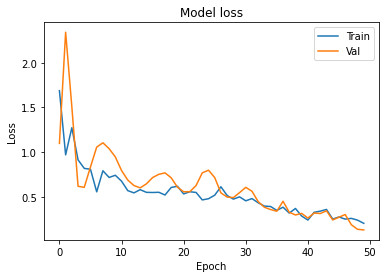

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

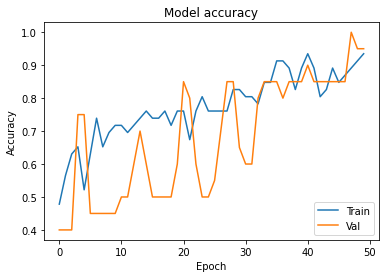

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()